In [43]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import random

In [44]:
def dfs(graph, start, end, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()

    path.append(start)
    visited.add(start)

    if start == end:
        return path

    neighbors = list(graph[start])
    random.shuffle(neighbors)  # Randomize the order of neighbors
    for neighbor in neighbors:
        if neighbor not in visited:
            new_path = dfs(graph, neighbor, end, path.copy(), visited.copy())
            if new_path:
                return new_path
    return None

In [77]:
def create_graph(maze):
    graph = {}
    for i, row in enumerate(maze):
        for j, cell in enumerate(row):
            if cell == 0:  # Only consider paths, not walls
                graph[(i, j)] = []
                for direction in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                    ni, nj = i + direction[0], j + direction[1]
                    if 0 <= ni < len(maze) and 0 <= nj < len(maze[0]) and maze[ni][nj] == 0:
                        graph[(i, j)].append((ni, nj))
    return graph


In [78]:

def visualize_path(maze, path):
    # Convert the maze to a NumPy array for easier plotting
    maze_np = np.array(maze)
    # Create an overlay for the path
    overlay = np.zeros_like(maze_np)
    for i, j in path:
        overlay[i, j] = 2  # Marking the path

    # Create a custom color map
    cmap = ListedColormap(['white', 'black', 'green'])
    # Plotting
    fig, ax = plt.subplots()
    ax.imshow(maze_np + overlay, cmap=cmap, interpolation='nearest', norm=plt.Normalize(vmin=0, vmax=2))
    ax.grid(which='major', color='grey', linestyle='-', linewidth=0.5)
    ax.set_xticks(np.arange(-0.5, len(maze[0]), 1))
    ax.set_yticks(np.arange(-0.5, len(maze), 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.show()


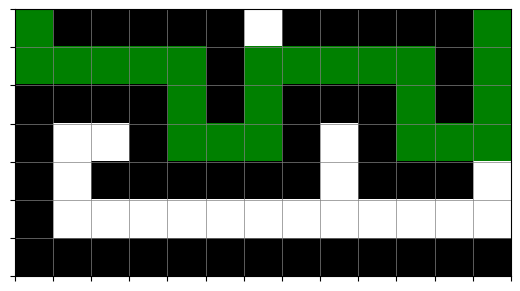

In [83]:
# maze array
maze = [
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

graph = create_graph(maze)
start, end = (0, 0), (0, 12)
path = dfs(graph, start, end)

if path:
    visualize_path(maze, path)
else:
    print("No path found")
